In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ML for Regression
from sklearn.linear_model import LogisticRegression as lor
from sklearn.model_selection import train_test_split

#Control display
pd.options.display.max_columns = 30
sns.set(style = "darkgrid" , rc = {'axes.facecolor':'#CAF1DE'})


"""#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
"""

"#Ignore warnings\nimport warnings\nwarnings.filterwarnings('ignore')\n"

In [3]:
#Load dataset
df = pd.read_csv("heart_disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
"""
cp = chest pain
chol = cholesterol
trestbps = resting blood pressure
fbs = fasting blood sugar
restecg = resting electrocardiography
exang = exercise induced agina
aldpeak = ST depression induced
slope = the slope of the peak exercise 
ca = number of major vessel
thal =  

"""

In [6]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [9]:
# show percentage of male and female
count_female = len(df[df.sex == 0])
count_male = len(df[df.sex == 1])

#showing output
print("percentage of male: {:.2f}%".format(count_female/(len(df.sex))*100))
print("percentage of male: {:.2f}%".format(count_male/(len(df.sex))*100))


percentage of male: 30.44%
percentage of male: 69.56%


In [10]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


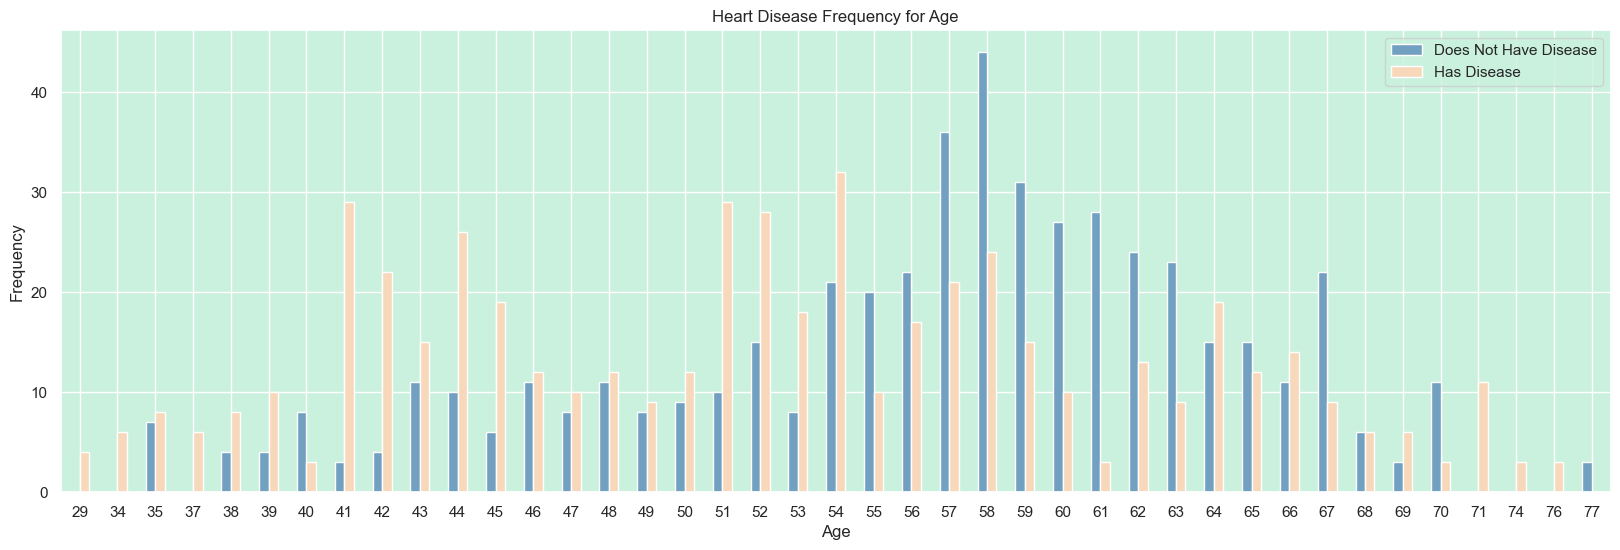

In [18]:
# Create a crosstab to count the frequency of heart disease for each age
age_target_crosstab = pd.crosstab(df['age'], df['target'])

# Plot the bar plot
age_target_crosstab.plot(kind='bar', figsize=(20, 6), color=['#72A0C1', '#F7D8BA'])
plt.title("Heart Disease Frequency for Age")
plt.xlabel('Age')
plt.legend(['Does Not Have Disease', 'Has Disease'])
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

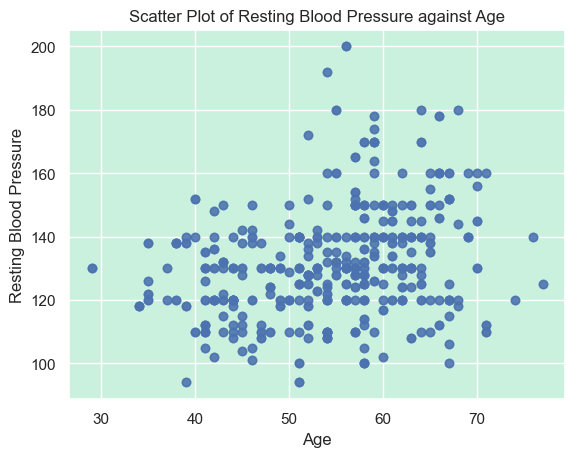

In [19]:
# Extract 'age' and 'trestbps' columns
age = df['age']
trestbps = df['trestbps']

# Create the scatter plot
plt.scatter(age, trestbps, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Scatter Plot of Resting Blood Pressure against Age')
plt.show()

In [ ]:
#Creating model for Logistic Regression
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [ ]:
#Normalise the data 
x  = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [ ]:
#split the data 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)